# Linear Regression 

## import library

In [3]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [4]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

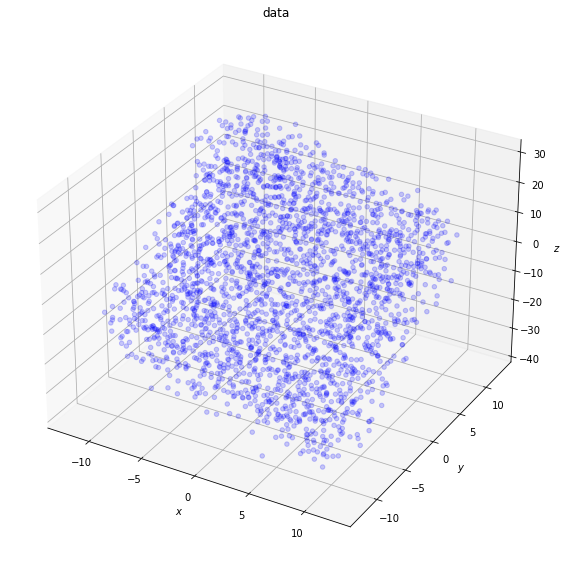

In [5]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [6]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual = z - (theta[0] + theta[1] * x + theta[2] * y)
    # ============================
    return residual

In [7]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    loss = 1 / num_data
    sum = 0
    for i in range(num_data):
        sum += (compute_residual(theta, x[i], y[i], z[i]) *  compute_residual(theta, x[i], y[i], z[i]))
    loss = loss * sum
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [8]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    X = np.zeros((num_data, theta.size))
    for i in range(num_data):
        X[i][0] = 1
        X[i][1] = x[i]
        X[i][2] = y[i]
    grad = 2/num_data
    X_T = X.T
    Xmultheta = np.matmul(X, theta)
    Xmulthetasubz = Xmultheta - z
    final = np.matmul(X_T, Xmulthetasubz)
    grad = grad * final
    # ============================
    return grad

## gradient descent for each model parameter

In [9]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    theta = theta - learning_rate * compute_gradient(theta, xx, yy, zz)
    theta_iteration[i] = theta
    loss = compute_loss(theta, xx, yy, zz)
    loss_iteration[i] = loss
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 36.47383
iteration =    1, loss = 23.67882
iteration =    2, loss = 22.34121
iteration =    3, loss = 21.94253
iteration =    4, loss = 21.63132
iteration =    5, loss = 21.33822
iteration =    6, loss = 21.05721
iteration =    7, loss = 20.78736
iteration =    8, loss = 20.52820
iteration =    9, loss = 20.27930
iteration =   10, loss = 20.04026
iteration =   11, loss = 19.81068
iteration =   12, loss = 19.59020
iteration =   13, loss = 19.37844
iteration =   14, loss = 19.17508
iteration =   15, loss = 18.97976
iteration =   16, loss = 18.79218
iteration =   17, loss = 18.61203
iteration =   18, loss = 18.43901
iteration =   19, loss = 18.27284
iteration =   20, loss = 18.11326
iteration =   21, loss = 17.95999
iteration =   22, loss = 17.81279
iteration =   23, loss = 17.67143
iteration =   24, loss = 17.53566
iteration =   25, loss = 17.40526
iteration =   26, loss = 17.28003
iteration =   27, loss = 17.15976
iteration =   28, loss = 17.04425
iteration =   

In [24]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [11]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    plt.plot(loss_iteration, '-', color = 'red')
    # ============================
    plt.tight_layout()
    plt.show()

In [13]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

    # ============================    
    plt.tight_layout()
    plt.show()

In [83]:

def plot_model_parameter(theta_iteration):
    theta_iteration_T = theta_iteration.T
    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    plt.plot(theta_iteration_T[0], '-', color = 'red')
    plt.plot(theta_iteration_T[1], '-', color = 'green')
    plt.plot(theta_iteration_T[2], '-', color = 'blue')
    # ============================
    plt.tight_layout()
    plt.show()

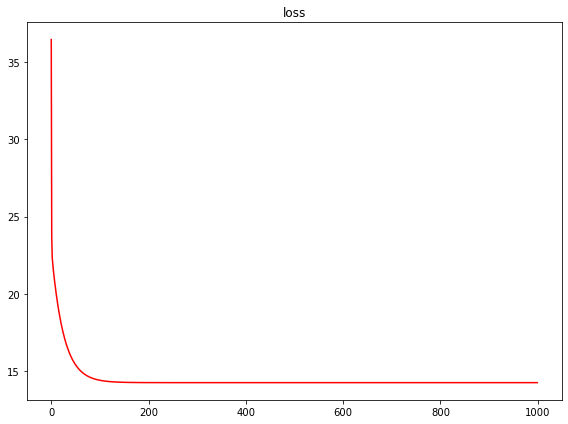

In [84]:
plot_loss_curve(loss_iteration)

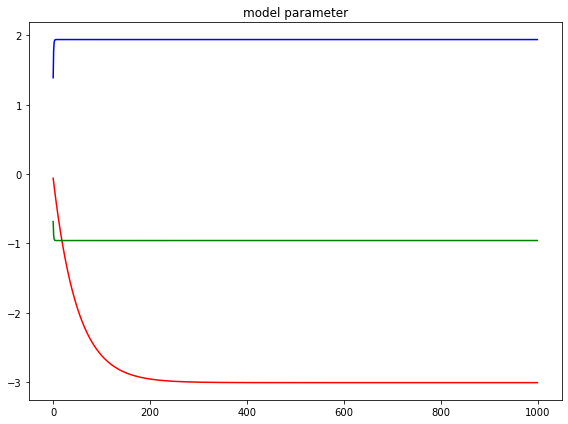

In [85]:
plot_model_parameter(theta_iteration)

In [81]:
def plot_surface(xx, yy, zz):
    
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('loss surface')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    xx, yy = np.meshgrid(xx, yy)
    ZZ = theta_iteration[999][0] + theta_iteration[999][1] * xx + theta_iteration[999][2]*yy
    ax.plot_surface(xx, yy, ZZ,cmap='plasma')

    plt.tight_layout()
    plt.show()

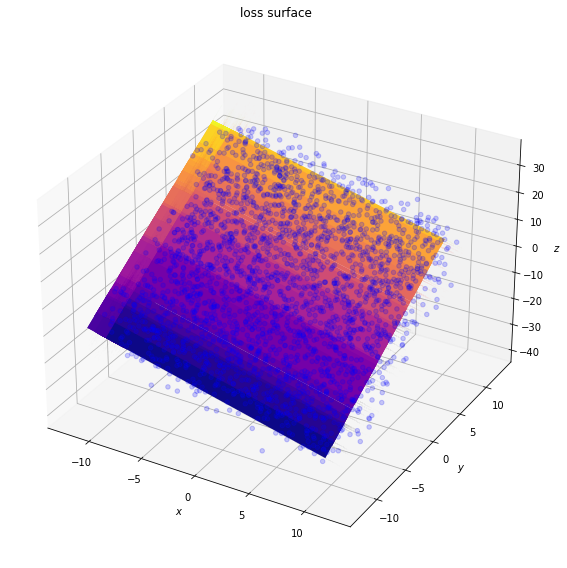

In [82]:
plot_surface(xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

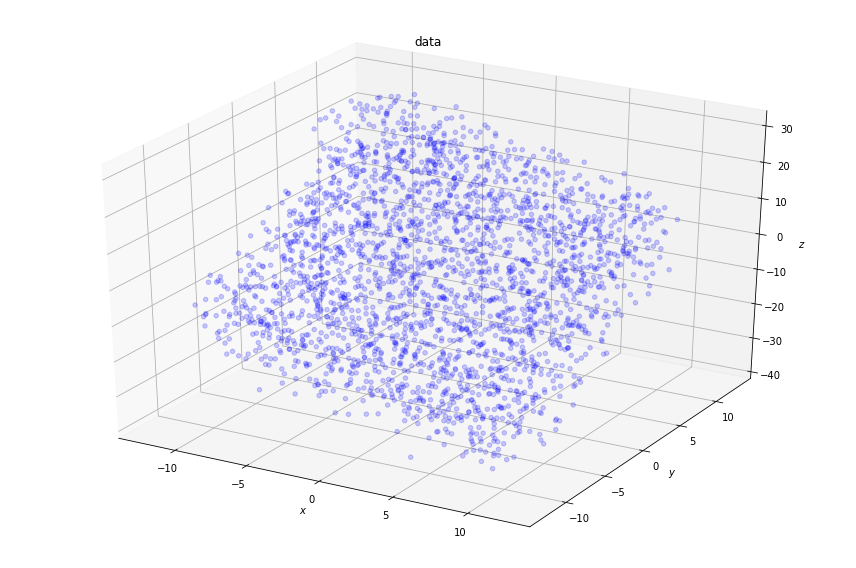

In [8]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

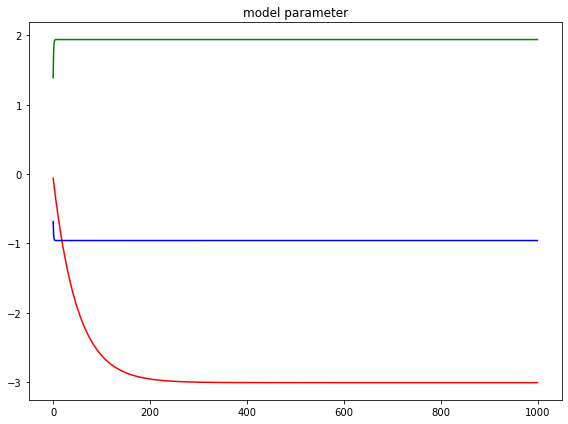

In [72]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

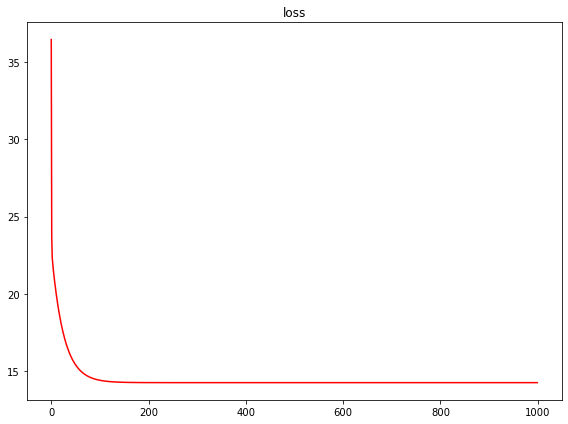

In [73]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

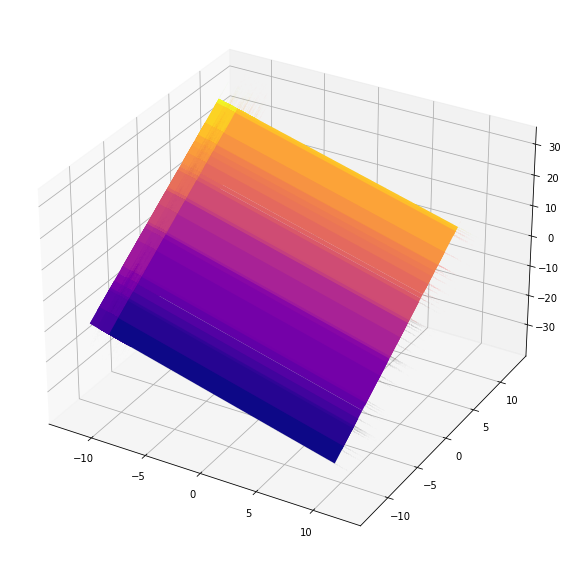

In [75]:
plot_surface(xx, yy, zz)